In [2]:
# default_exp interpretability.prototypes_criticisms

In [1]:
# export

import numpy as np
import pandas as pd

from typing import Tuple, List, Optional, Any, Iterable
from abc import ABC, abstractmethod

from pathlib import Path
# ds4se
import ds4se
from ds4se.utils.clusterization import *
from ds4se.utils.visualization import *
from ds4se.mgmnt.prep.files_mgmnt import load_np_vectors

In [311]:
import plotly.io as plt_io
import plotly.graph_objects as go
import plotly.offline as pyo

pyo.init_notebook_mode()

## prototypes_criticisms

> Protoypes and criticisms analysis based on [Section 6.3](https://christophm.github.io/interpretable-ml-book/proto.html) section of the [Interpretable Machine Learning book](https://christophm.github.io/interpretable-ml-book/)

## Utils

In [2]:
# export

def reshape_vectors(vectors):
    result = []
    for v in vectors:
        result.append(v.reshape(500,1).T)
    return np.array(result)

## Parameterization

In [6]:
params = {
    "vectors_path": "/tf/main/dvc-ds4se/results/d2v_vectors",
    "plots_path": "/tf/main/dvc-ds4se/results/plotting"
}

## Find Prototypes

The authors of the book use a method based on the  maximum mean discrepancy. However, they highlight the fact that any* clustering algorithm can be used.

\* The clustering algorithm used to find prototypes should return <i>real</i> data points as centroids.

In [3]:
# export


# General implementation aiming to allow the use of different clustering algorithms

class Clusterizer(ABC):
    def __init__(self):
        pass
    
    @abstractmethod
    def perform_clusterization(self, data_vectors: np.ndarray, dims: Optional[int]=2):
        """
        Perform clusterization on a given dataset
        
        """
        pass

In [4]:
# export

class KMedoidsClusterizer(Clusterizer):
    def __init__(self):
        # TODO
        super().__init__()
        
    def perform_clusterization(self, data_vectors: np, dims: Optional[int]=2) -> Tuple:
        """
        Perform clusterization using k-medoids
        - First perform dimensionality reduction by means of PCA + t-SNE
        - Finds best k
        
        :param data_vectors:
        :param dims: Int. indicating the number of dimensions for
                     dim. reduction
                     
        :return: Tuple (reduced data, clusters, medoid ids, k_medoids_instance (pyclustering obj.))
        """
        return perform_clusterize_kmedoids(data_vectors, dims)
        

In [6]:
# TODO: Integrate gravitational clustering

In [17]:
trn_vectors = load_np_vectors(f"{params['vectors_path']}/doc2_vec_sample_java_df.npy")

In [21]:
tst_vectors = load_np_vectors(f"{params['vectors_path']}/doc2_vec_java_test_df.npy")

In [23]:
tst_vectors.shape

(10000, 500)

In [18]:
print(trn_vectors)
print(trn_vectors.shape)

[[-0.37762475 -0.38540062 -0.01277232 ...  0.45781606  0.19079459
   0.26853234]
 [-0.17740302 -0.01685066  0.3694753  ... -0.18609756 -0.0205524
  -0.05089067]
 [-0.6700186   0.37853143 -0.04435137 ...  1.0894055   0.01246784
  -0.19507329]
 ...
 [ 0.2327957   0.30608505 -0.06560351 ...  0.2620101   0.41106102
  -0.15154514]
 [ 0.05280151  0.4234941  -0.5358744  ...  0.02667005  0.4553478
   0.18505383]
 [-0.02004011  0.30035594  0.02699976 ...  0.19926223  0.04953865
  -0.06755862]]
(10000, 500)


In [9]:
km_clusterizer = KMedoidsClusterizer()

In [10]:
trn_cluster  = km_clusterizer.perform_clusterization(trn_vectors, dims=2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 1.470s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.333654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.490433
[t-SNE] KL divergence after 300 iterations: 3.648281


In [28]:
trn_cluster = cluster_result

In [25]:
feat_vectors_trn, clusters_trn, medoid_ids_trn, kmedoids_instance_trn = cluster_result

In [26]:
tst_cluster = km_clusterizer.perform_clusterization(tst_vectors, dims=2)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 1.736s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.397580
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.223938
[t-SNE] KL divergence after 300 iterations: 3.710767


In [27]:
feat_vectors_tst, clusters_tst, medoid_ids_tst, kmedoids_instance_tst = cluster_result

In [19]:
help(kmedoids_instance)

Help on kmedoids in module pyclustering.cluster.kmedoids object:

class kmedoids(builtins.object)
 |  !
 |  @brief Class represents clustering algorithm K-Medoids (PAM algorithm).
 |  @details PAM is a partitioning clustering algorithm that uses the medoids instead of centers like in case of K-Means
 |            algorithm. Medoid is an object with the smallest dissimilarity to all others in the cluster. PAM algorithm
ight )$.
 |  
 |  There is an example where PAM algorithm is used to cluster 'TwoDiamonds' data:
 |  @code
 |      from pyclustering.cluster.kmedoids import kmedoids
 |      from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
 |      from pyclustering.cluster import cluster_visualizer
 |      from pyclustering.utils import read_sample
 |      from pyclustering.samples.definitions import FCPS_SAMPLES
 |  
 |      # Load list of points for cluster analysis.
 |      sample = read_sample(FCPS_SAMPLES.SAMPLE_TWO_DIAMONDS)
 |  
 |      # Initialize 

In [48]:
cluster_test_result = {
    'train': trn_cluster,
    'test': tst_cluster
}

In [25]:
import json

In [18]:
clusters = {}
clusters['test_data'] = cluster_result

In [12]:
# TODO: Integrate Gravitational clustering

## Find Criticisms

Points are selected as criticisms where the distribution of prototypes differs from the distribution of the data

In [70]:
class CriticismFinder:
    
    def get_critisicms(data, prototypes: List, n: Optional[int]=None,
                       distance: Optional[Any]=None) ->Tuple:
        """
        :param data: Dataset
        :param prototypes: List of found prototypes
        :param n: Numbers of criticisms to find
        :param distance: Distance object instantiating appropriate distance calculation
        
        :return: Tuple (criticisms points, criticisms ids)
        """
        crit_points, crit_ids = gen_criticisms(data, prototypes, n, distance)
        return crit_points, crit_ids

In [90]:
crit_finder = CriticismFinder()

In [ ]:
# TODO: crit_finder.get_criticisms(feat_vectors, )

## Gaussian mixture models

In [ ]:
params['plots_path']

## Perform plotting

In [270]:
import umap

In [273]:
def _reduce_dims_umap(vectors, n_neighbors: Optional[int]=15,
                     min_dist: Optional[float]=0.1, dims: Optional[int]=2,
                     metric: Optional[str]='euclidean') -> np.ndarray:
    """
    Perform dimensionality reduction using UMAP
    :param vectors: Data vectors to be reduced
    :param dims: Optional[int] indicating the number of dimensions of the desired space
    
    :return: Vectors with the desired dimensionality
    """
    
    reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=dims,
        metric=metric
    )
    
    umap_vectors = reducer.fit_transform(vectors)
    return umap_vectors 

In [287]:
def _clusterize_kmedoids(data: np.array, distance_metric='euclidean', dims: int = 2) -> Tuple:
    # reduced_data = reduce_dims(data, dims = dims)
    reduced_data = _reduce_dims_umap(data, dims = dims, metric=distance_metric)
    logging.info('Reduced dimensionality via UMAP')
    k = find_best_k(reduced_data)
    
    clusters, medoid_ids, kmedoids_instance = run_kmedoids(reduced_data, k)
    
    return reduced_data, clusters, medoid_ids, kmedoids_instance    

In [288]:
trn_cluster_result = _clusterize_kmedoids(trn_vectors, distance_metric='cosine')

In [291]:
tst_cluster_result = _clusterize_kmedoids(tst_vectors, distance_metric='cosine')

In [278]:
reduced_vectors = _reduce_dims_umap(trn_vectors, metric='cosine')

In [279]:
reduced_vectors.shape

(10000, 2)

In [85]:
def __plot_gmm(cluster: Tuple, model: str, c, out_path: str, export: Optional[bool]=True):
    """
    Plot Gaussian Mixture models for an individual set of samples
    
    :param cluster:
    :param model:
    :param c:
    :param out_path:
    :param export: Bool indicating whether or not store the generated figure
    """
    plt.figure(figsize = (8, 8))
    plt.title(f'Gaussian Mixture Models for {model} samples.\n')
    
    samples, _, medoid_ids, _ = cluster
    plt.plot(samples[:, 0], samples[:, 1], c, markersize = 4, zorder = -1)
    gmm = generate_distributions(samples, len(medoid_ids))

    # Plot Data
    visualize_2D_gmm(samples, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, model, c)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.legend([model])
    plt.grid(True)
    
    if export:
        _save_plot(out_path, f"gmm_{model}")

In [122]:
def __plot_gmm_2D(clusters, export: Optional[bool]=False):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 2)
    plt.clf()
    for i, model in enumerate(clusters):
        feature_vectors, _, _, _, kmeans = clusters[model]
        gmm = generate_distributions(feature_vectors, kmeans.n_clusters - 1)

        # Plot Data
        plt.subplot(gs[0, i])
        visualize_2D_gmm(feature_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, i)
        
#     if export:
#         if not os.path.exists('images/'): os.mkdir('images/')
#         plt.savefig('images/2D_GMM_demonstration.png', dpi=100, format='png')
    plt.show()    

In [303]:
def __plot_gmm_single_distribution(cluster_data: Tuple, model: str,
                                   out_path: str, 
                                   colmap: Optional = {0: 'c.', 1: 'm.', 2: 'y.'},
                                   export: Optional[bool]=False):
    """
    Plot the distribution of data along with GMMs based on the provided clsuters
    
    :param cluster_data: Tuple containing (feat_vectors, _, cluster_centroids, _)
    :param model: Str indicating the model being plotted
    :param colmap: Dict. containing the colors
    :param lim: Float indicating the limit value for the plot
    :param export: Bool indicating whether or not save the generated plot
    """
    
    plt.figure(figsize = (8, 8))
    plt.title(f'Gaussian Mixture Models for {model}')
    gmms = {}
    feat_vectors, _, centroid_ids, _ = cluster_data
    plt.plot(feat_vectors[:, 0], feat_vectors[:, 1], 'c.', markersize = 4, zorder = -1)
    gmm = generate_distributions(feat_vectors, len(medoid_ids))
    gmms[model] = gmm
    
    visualize_2D_gmm(feat_vectors, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, model, 'g')
    
    
    x_min = feat_vectors[:, 0].min() - 1
    x_max = feat_vectors[:, 0].max() + 1
        
    y_min = feat_vectors[:, 1].min() - 1
    y_max = feat_vectors[:, 1].max() + 1
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.grid(True)
    
    if export:
        _save_plot(out_path, f"GMM_distribution-{model}")

In [ ]:
def __visualize_2D_gmm(points, w, mu, stdev, id, c, export=False):
    """
    Visualize GMM distributions via plotly
    
    """
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))

In [229]:
def __plot_data_distribution(feat_vectors: np.ndarray, model: str,
                             out_path: str,
                             color: Optional[str]='c.',
                             export: Optional[bool]=False):
    """
    """
    
    plt.figure(figsize=(8, 8))
    plt.title(f"Data Distribution for {model}")
    
    # plt.scatter(feat_vectors[:, 0], feat_vectors[:, 1], color=color, marker='.', zorder=-1)
    plt.plot(feat_vectors[:, 0], feat_vectors[:, 1], 'c.', markersize = 4, zorder = -1)
    
    if export:
        _save_plot()

In [267]:
def _plot_data_distribution_2d(component1, component2):
    fig = go.Figure(data=go.Scatter(
        x = component1,
        y = component2,
        mode='markers',
        marker=dict(
            size=5,
            # color=y, #set color equal to a variable
            # colorscale='Rainbow', # one of plotly colorscales
            #showscale=True,
            line_width=1
        )
    ), layout_title_text="Data distribution")
    
    fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=600)
    fig.layout.template = 'plotly'
    
    fig.show()

In [308]:
_plot_data_distribution_2d(cluster_test_result['train'][0][:,0], cluster_test_result['train'][0][:,1])

In [309]:
_plot_data_distribution_2d(reduced_vectors[:, 0], reduced_vectors[:, 1])

In [280]:
_plot_data_distribution_2d(reduced_vectors[:, 0], reduced_vectors[:, 1])

In [292]:
cluster_data = {
    'train': trn_cluster_result,
    'test': tst_cluster_result
}

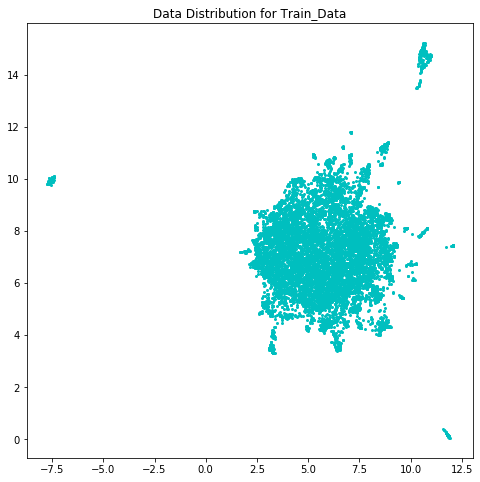

In [293]:
__plot_data_distribution(cluster_data['train'][0], 'Train_Data', 'asdf', color= 'cornflowerblue')

In [ ]:
__plot_data_distribution(cluster_data['test'])

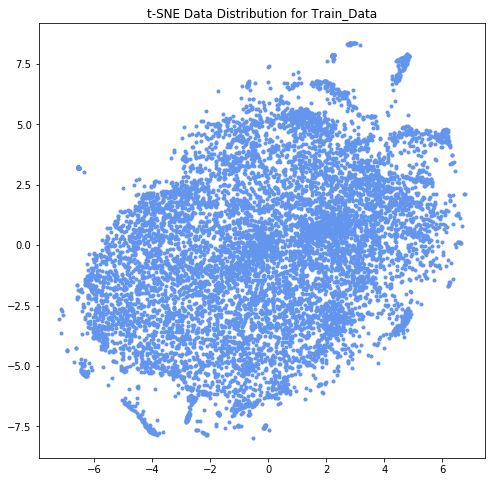

In [226]:
__plot_data_distribution(cluster_test_result['train'][0], 'Train_Data', 'asdf', color= 'cornflowerblue')

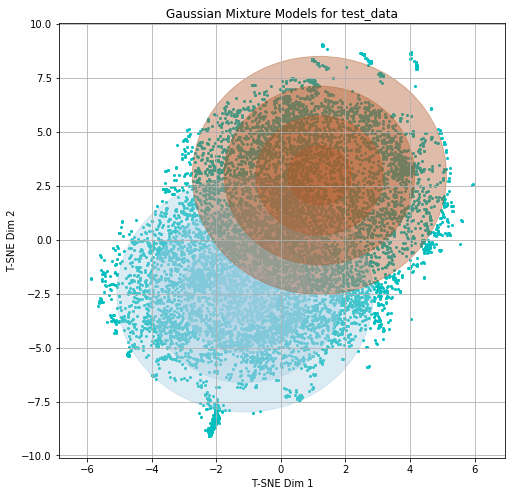

In [304]:
__plot_gmm_single_distribution(cluster_test_result['test'], 'test_data', 'whatever', export=False)

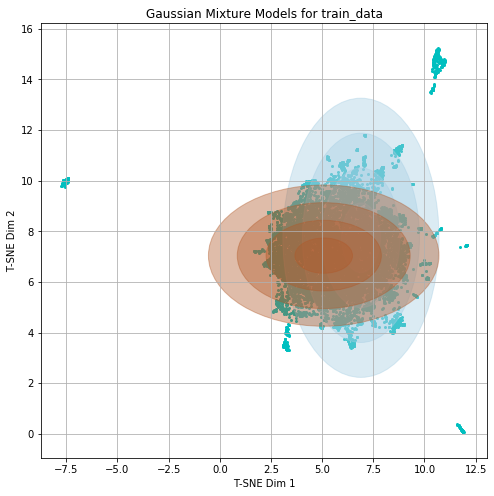

In [305]:
__plot_gmm_single_distribution(cluster_data['train'], 'train_data', 'whatever', export=False)

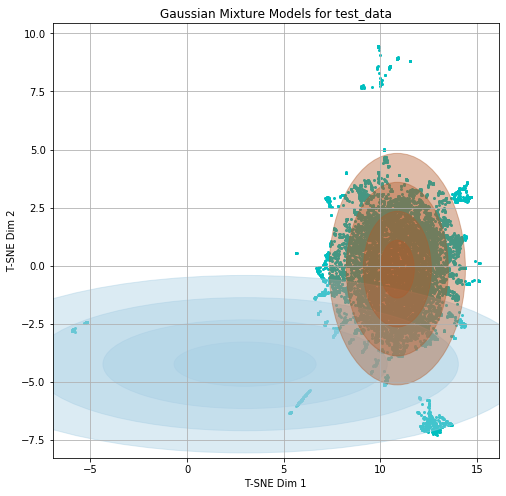

In [306]:
__plot_gmm_single_distribution(cluster_data['test'], 'test_data', 'whatever', export=False)

In [84]:
len(cluster_test_result['train'])

4

In [123]:
__plot_gmm_2D(cluster_test_result)

ValueError: not enough values to unpack (expected 5, got 4)

<Figure size 864x576 with 0 Axes>

In [74]:
for i, c, in enumerate(cluster_test_result):
    print(c)

train
test


ValueError: too many values to unpack (expected 5)

<Figure size 864x576 with 0 Axes>

In [50]:
type(cluster_test_result['train'])

tuple

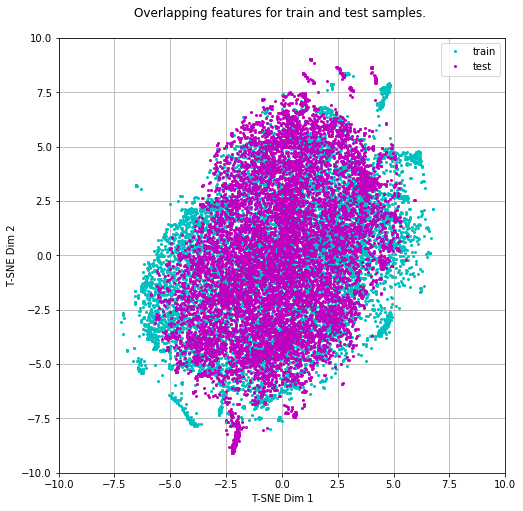

In [76]:
plot_overlapping_features(cluster_test_result, 'asdfasd', export=False)

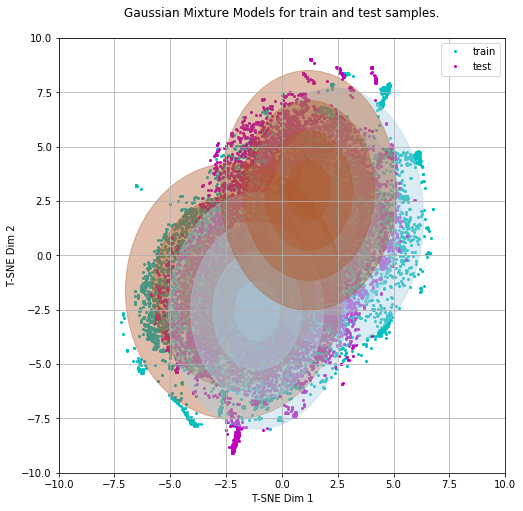

In [96]:
plot_overlapping_gmm(cluster_test_result, 'whatever', export=False)

In [104]:
def __plot_gmm_2d(clusters: Dict, out_path: str, export = False):
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 2)
    plt.clf()
    colors = ['c', 'g', 'm', 'y']
    for i, model in enumerate(clusters):
        samples, _, medoid_ids, _ = clusters[model]
        gmm = generate_distributions(samples, len(medoid_ids))

        # Plot Data
        plt.subplot(gs[0, i])
        __visualize_2D_gmm(samples, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, model)
        
    if export:
        _save_plot(out_path, f"2D_GMM_{model}")
    plt.show()

In [105]:
def __visualize_2D_gmm(points, w, mu, stdev, id, export=False):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    axes = plt.gca()
    colors = cmx.Accent(np.linspace(0, 1, n_gaussians)) if id == 'human' else cmx.Paired(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = range(i * N, (i + 1) * N)
        for j in range(4):
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], alpha = 0.4, fill=True, color=colors[i]))
    plt.xlabel('T-SNE Dim 1')
    plt.ylabel('T-SNE Dim 2')

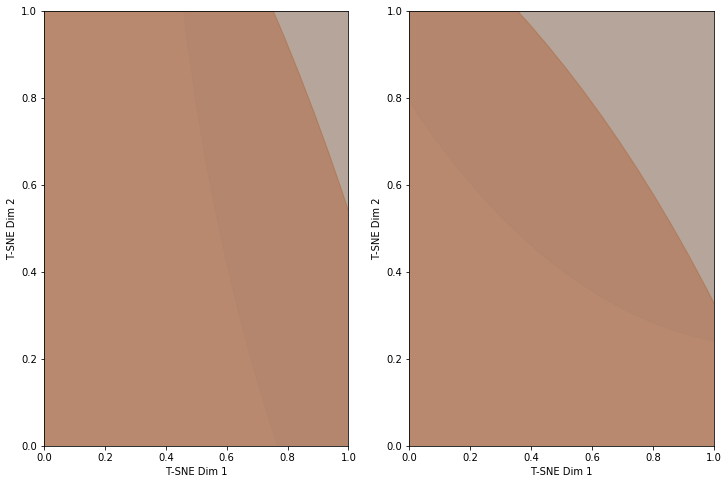

In [106]:
__plot_gmm_2d(cluster_test_result, 'train', export=False)

In [55]:
# export

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cmx
import matplotlib.patches as patches

import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap, LogNorm

from sklearn.neighbors import KernelDensity
from sklearn.mixture import GaussianMixture

from datetime import datetime
from pathlib import Path
from typing import Optional, Dict, Tuple
from collections.abc import Iterable

# Configs

import logging

logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)

In [68]:

def ___plot_overlapping_and_gmms(clusters, out_path: str, export: Optional[bool]=True) -> Tuple[float, float]:
    """
    Plot the overlapping distribution of 2 sample sets
    
    :param clusters: Dict. containing clusters info.
    :param export: Bool indicating whether or not store the generated figure
    
    :return: Tuple (KL div. dist1-dist2, KL div. dist2-dist1)    
    """
    plt.figure(figsize=(12, 8))
    # Create 2x2 sub plots
    gs = gridspec.GridSpec(2, 2)
    plt.clf()
        
    plt.subplot(gs[1, 0])
    colmap = {0: 'co', 1: 'mo'}
    
    models = list(clusters.keys())
    plt.title(f'Overlapping distributions\nCyan denotes {models[0]} samples and \
    \nMagenta denotes {models[1]} samples.')
    
    for i, model in enumerate(clusters):
        samples, _, _, _ = clusters[model]
        plt.plot(samples[:, 0], samples[:, 1], colmap[i], markersize=2)
        plt.xlim(-10, 10)
        plt.ylim(-10, 10)
        plt.xlabel('T-SNE Dim 1')
        plt.ylabel('T-SNE Dim 2')
    
    plt.subplot(gs[1, 1])
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    gmms = {}
    cs = ['c', 'm']
    sets = []
    for i, model in enumerate(clusters):
        samples, _, medoid_ids, _ = clusters[model]
        gmm = generate_distributions(samples, len(medoid_ids))
        gmms[model] = gmm
        
        # Plot Data
        visualize_2D_gmm(samples, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T, model, cs[i])
        
    # Compute Kl divergence
    
    dist1_to_dist2_kl = gmm_kl(gmms[models[0]], gmms[models[1]])
    dist2_to_dist1_kl = gmm_kl(gmms[models[1]], gmms[models[0]])
    
    plt.title(f'{models[0]} to {models[1]} KL Divergence: {dist1_to_dist2_kl}\
    \n{models[1]} to {models[0]} KL Divergence: {dist2_to_dist1_kl}')
    
    plt.show()
    
    if export:
        _save_plot(out_path, f"Distributions-{models[0]}-vs-{models[1]}")
        
    return dist1_to_dist2_kl, dist2_to_dist1_kl

In [60]:
list(cluster_test_result.keys())[0]

'train'

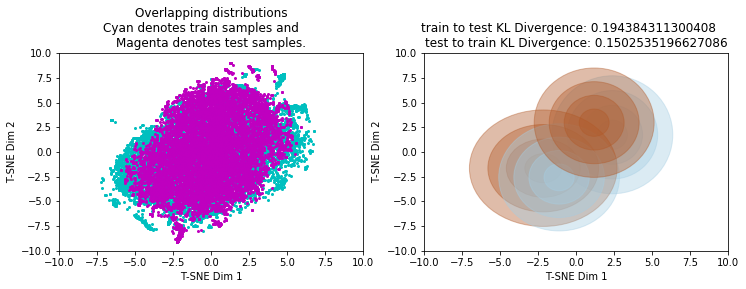

(0.194384311300408, 0.1502535196627086)

In [69]:
___plot_overlapping_and_gmms(cluster_test_result, 'whatever', export=False)

In [111]:
def __plot_kmedoids(cluster, model,
                  cmap = ListedColormap(["whitesmoke", "lightgrey", 'darkgrey', 'dimgrey', 'black']),
                  cm = 'c.', export = True):
    plt.figure(figsize=(8, 8))
    samples, centroids, xx, yy, Z = setup_meshgrid(cluster)
    _, crit_ids = gen_criticisms(samples, centroids)
    plt.imshow(
        Z, interpolation='nearest',
        extent = (xx.min(), xx.max(), yy.min(), yy.max()),
        cmap = cmap, aspect = 'auto', origin = 'lower'
    )
    plt.plot(samples[:, 0], samples[:, 1], cm, markersize = 4)
    plt.scatter(
        centroids[:, 0], centroids[:, 1],
        marker = 'o', s = 64, linewidths = 3,
        color = 'b', zorder = 10
    )
    for crit_id in crit_ids:
        plt.scatter(
            samples[crit_id, 0], samples[crit_id, 1],
            marker = 'x', s = 64, linewidths = 3, color = 'r',
            zorder = 10
        )
    plt.title(
        f'K-Medoids clustering via\n'
        f'(PCA & T-SNE - reduced data) for {model} testbed\n'
    )
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xlabel('T-SNE Dim 1')
    plt.ylabel('T-SNE Dim 2')
    plt.legend([model, 'prototypes', 'criticisms'])
    plt.grid(True)
    
    if export:
        plt.savefig(f'/tf/data/graphics/k-medoids_{model}.png', dpi=100, format='png')

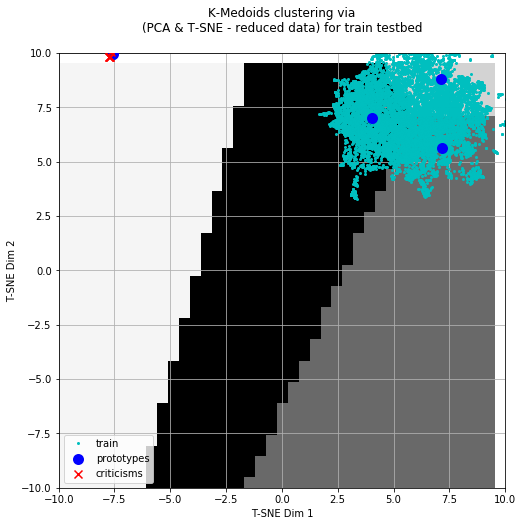

In [307]:
__plot_kmedoids(cluster_data['train'], 'train', export=False)

In [87]:
plot_clusters(cluster_test_result, out_path='whatever', export=False)

TypeError: string indices must be integers

<Figure size 864x576 with 0 Axes>

In [ ]:
from nbdev.export import notebook2script
notebook2script()